## 41128 Gayatri Godbole
## 41134 Pushkar Jain

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import resample
%matplotlib inline

# EDA

In [4]:
training_data = pd.read_csv('train.csv', index_col='PassengerId')

In [5]:
training_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
training_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
training_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
training_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# First preprocessing of data

**The following 4 operations must be applied on the test data too**
1. Remove Cabin feature which is empty for most of the records
2. Remove the Ticket feature (the ticket id) which doesn't sound as important
3. Fill the empty values of the Age class with the mean value
4. Fill the empty values of the Embarked columnn with the mode value

In [10]:
training_data.drop(['Cabin'], axis=1, inplace=True)

In [11]:
training_data.drop(['Ticket'], axis=1, inplace=True)

In [12]:
training_data.drop(['Name'], axis=1, inplace=True)

In [13]:
mean_age = training_data['Age'].mean()
training_data['Age'].fillna(mean_age, inplace=True)

In [14]:
embarked_mode = training_data['Embarked'].mode()
training_data['Embarked'].fillna(embarked_mode, inplace=True)

# EDA - continue

**Are there any outliers?**

<AxesSubplot:xlabel='Fare'>

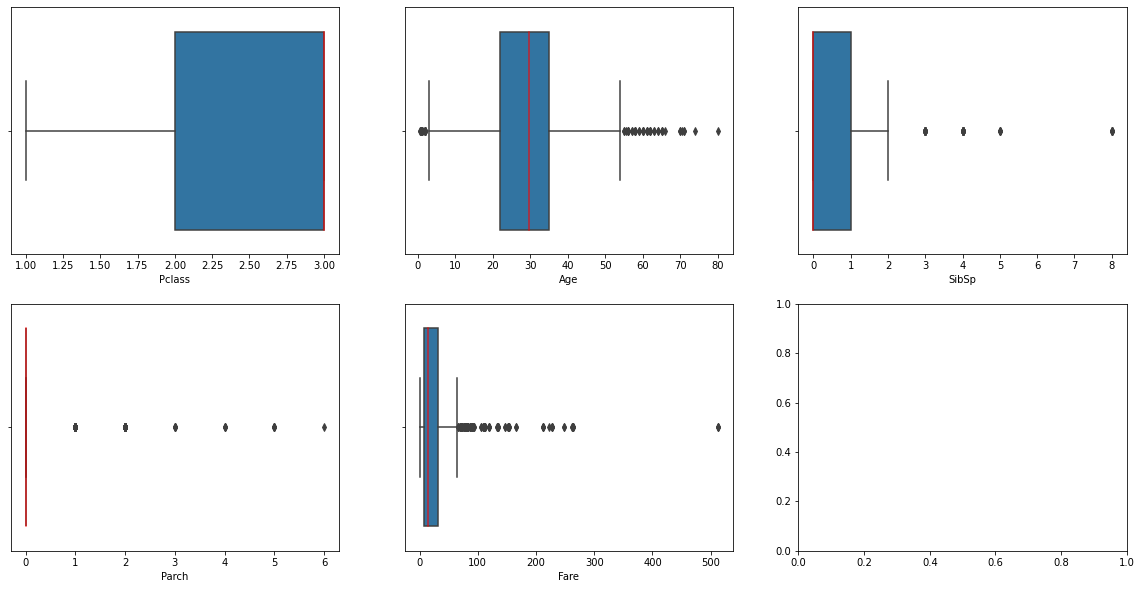

In [15]:
outlier_figure, outlier_axes = plt.subplots(2,3,figsize=(20,10))
sns.boxplot(ax=outlier_axes[0][0],data=training_data,x="Pclass",  medianprops=dict(color="red", alpha=0.7),)
sns.boxplot(ax=outlier_axes[0][1],data=training_data,x="Age",  medianprops=dict(color="red", alpha=0.7),)

sns.boxplot(ax=outlier_axes[0][2],data=training_data,x="SibSp",  medianprops=dict(color="red", alpha=0.7),)
sns.boxplot(ax=outlier_axes[1][0],data=training_data,x="Parch",  medianprops=dict(color="red", alpha=0.7),)
sns.boxplot(ax=outlier_axes[1][1],data=training_data,x="Fare",  medianprops=dict(color="red", alpha=0.7),)
#sns.boxplot(ax=outlier_axes[0][1],data=training_data,x="Embarked")

**Remove outliers**

In [16]:
def remove_outliers(feature_name, original_dataframe, result_dataframe):
    Q1 = np.percentile(original_dataframe[feature_name], 25, interpolation = 'midpoint')
    Q2 = np.percentile(original_dataframe[feature_name], 50, interpolation = 'midpoint')  
    Q3 = np.percentile(original_dataframe[feature_name], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('Low limit for ', feature_name, ' is ', low_lim)
    print('Upper limit for ', feature_name, ' is ', up_lim)
    print('Removing ', len(result_dataframe[result_dataframe[feature_name] < low_lim]), ' outliers for feature ', feature_name)
    result_dataframe = result_dataframe.drop(result_dataframe[result_dataframe[feature_name] < low_lim].index)
    result_dataframe = result_dataframe.drop(result_dataframe[result_dataframe[feature_name] > up_lim].index)
    return result_dataframe

In [17]:
no_outliers_training = training_data.copy()

In [18]:
feature_names = ['Age', 'SibSp', 'Parch', 'Fare']
for feature_name in feature_names:
    no_outliers_training =  remove_outliers(feature_name= feature_name, original_dataframe = training_data, result_dataframe = no_outliers_training)

Low limit for  Age  is  2.5
Upper limit for  Age  is  54.5
Removing  24  outliers for feature  Age
Low limit for  SibSp  is  -1.5
Upper limit for  SibSp  is  2.5
Removing  0  outliers for feature  SibSp
Low limit for  Parch  is  0.0
Upper limit for  Parch  is  0.0
Removing  0  outliers for feature  Parch
Low limit for  Fare  is  -26.724
Upper limit for  Fare  is  65.6344
Removing  0  outliers for feature  Fare


C:\Users\admin\AppData\Local\Temp\ipykernel_1196\2572292956.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(original_dataframe[feature_name], 25, interpolation = 'midpoint')
C:\Users\admin\AppData\Local\Temp\ipykernel_1196\2572292956.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(original_dataframe[feature_name], 50, interpolation = 'midpoint')
C:\Users\admin\AppData\Local\Temp\ipykernel_1196\2572292956.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of t

In [19]:
training_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
no_outliers_training.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,577.000000,577.0,577.000000
mean,0.299827,2.502600,29.742060,0.199307,0.0,14.926356
std,0.458579,0.733909,8.516997,0.445034,0.0,12.606521
min,0.000000,1.000000,5.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.0,7.775000
50%,0.000000,3.000000,29.699118,0.000000,0.0,8.662500
75%,1.000000,3.000000,32.500000,0.000000,0.0,15.850000
max,1.000000,3.000000,54.000000,2.000000,0.0,61.175000


<AxesSubplot:>

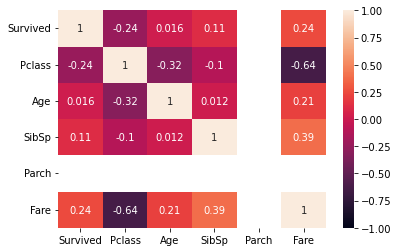

In [21]:
sns.heatmap(data=no_outliers_training.corr(method="spearman"),vmin=-1,vmax=1,annot=True)

C:\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


<Figure size 432x288 with 0 Axes>

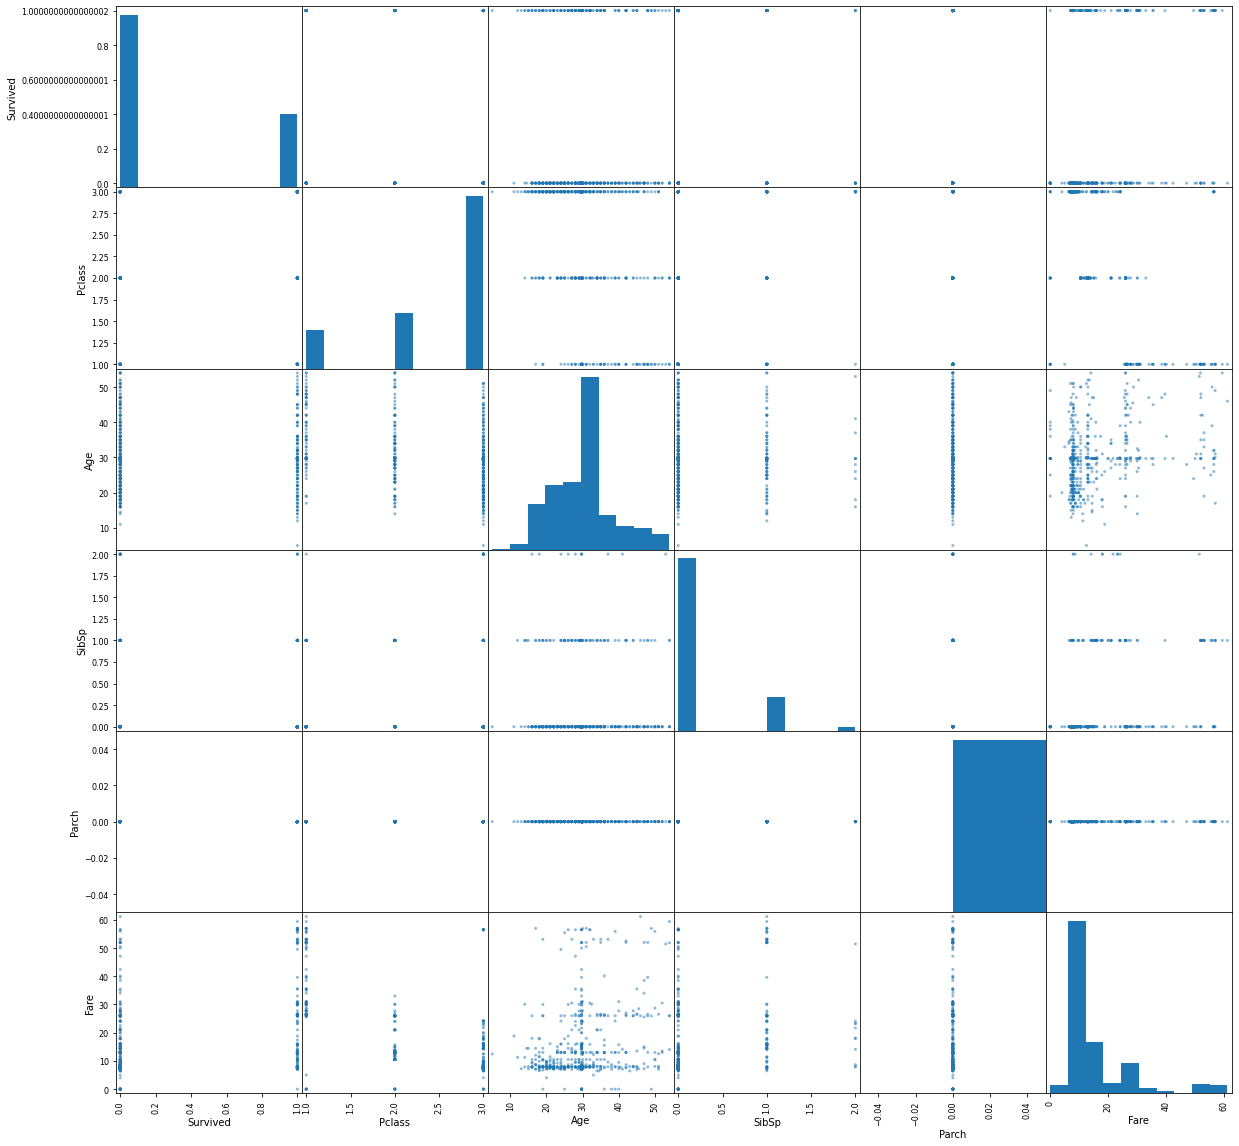

<Figure size 432x288 with 0 Axes>

In [22]:
pd.plotting.scatter_matrix(no_outliers_training,figsize=(20,20))
plt.figure()

**Is the dataset balanced?**

**Before balancing the data**

We'll map the Sex and Embarked columns to numeric values. **This operation must be applied to test data too**

In [23]:
label_encoder = LabelEncoder()

In [24]:
no_outliers_training['Sex']= label_encoder.fit_transform(no_outliers_training['Sex'])
no_outliers_training['Embarked']= label_encoder.fit_transform(no_outliers_training['Embarked'])

**Balance the data**

In [25]:
!pip install -U imbalanced-learn
from imblearn.combine import SMOTETomek

In [26]:
X_train = no_outliers_training.drop('Survived', axis=1)

In [27]:
y_train = no_outliers_training['Survived']

In [28]:
smote_tomek = SMOTETomek(random_state = 12)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

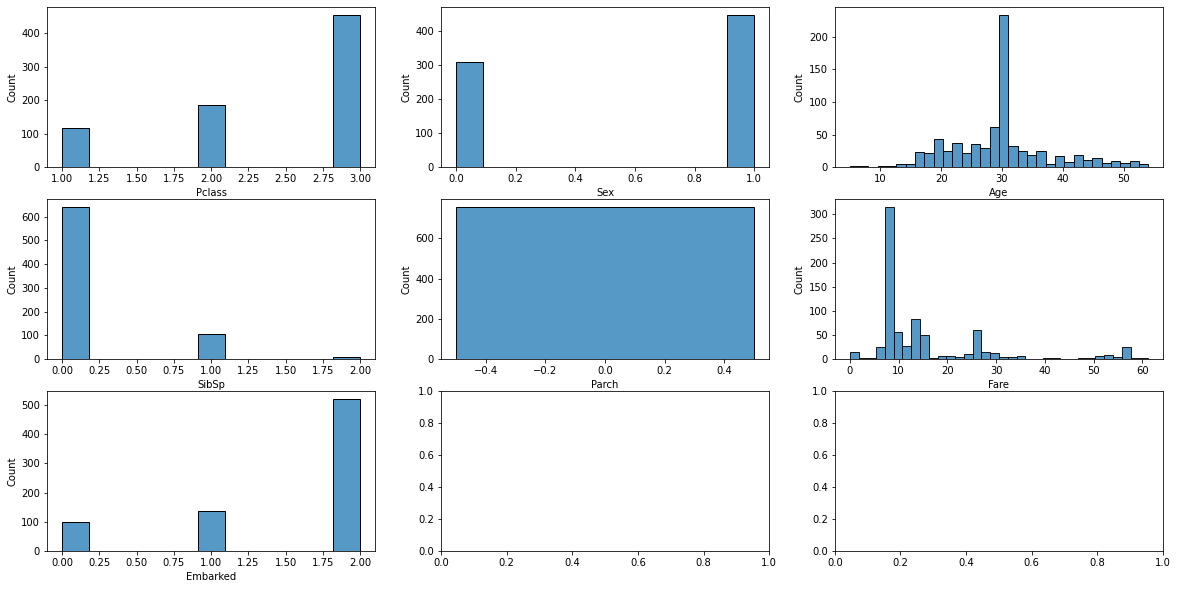

In [29]:
resampled_figure, resampled_axes = plt.subplots(3,3,figsize=(20,10))
sns.histplot(ax=resampled_axes[0][0],data=X_train_resampled,x="Pclass")
sns.histplot(ax=resampled_axes[0][1],data=X_train_resampled,x="Sex")
sns.histplot(ax=resampled_axes[0][2],data=X_train_resampled,x="Age")


sns.histplot(ax=resampled_axes[1][0],data=X_train_resampled,x="SibSp")
sns.histplot(ax=resampled_axes[1][1],data=X_train_resampled,x="Parch")
sns.histplot(ax=resampled_axes[1][2],data=X_train_resampled,x="Fare")
sns.histplot(ax=resampled_axes[2][0],data=X_train_resampled,x="Embarked")

# Choose a model

Let's start by checking the order of magnitude of our resampled dataset

In [30]:
X_train_resampled.count()

Pclass      758
Sex         758
Age         758
SibSp       758
Parch       758
Fare        758
Embarked    758
dtype: int64

In [31]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    758 non-null    int64  
 1   Sex       758 non-null    int32  
 2   Age       758 non-null    float64
 3   SibSp     758 non-null    int64  
 4   Parch     758 non-null    int64  
 5   Fare      758 non-null    float64
 6   Embarked  758 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 35.7 KB


In [32]:
X_train_resampled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,3,0,26.000000,0,0,7.9250,2
2,1,0,35.000000,1,0,53.1000,2
3,3,1,35.000000,0,0,8.0500,2
4,3,1,29.699118,0,0,8.4583,1


In [33]:
y_train_resampled.head()

0    0
1    1
2    1
3    0
4    0
Name: Survived, dtype: int64

# Data normalization

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train_resampled.values), columns=X_train_resampled.columns, index=X_train_resampled.index)

In [37]:
print(X_train_scaled.head())

     Pclass       Sex       Age     SibSp  Parch      Fare  Embarked
0  0.743140  0.829576 -0.919424  2.052727    0.0 -0.640673  0.618565
1  0.743140 -1.205435 -0.432030 -0.409246    0.0 -0.588214  0.618565
2 -1.945644 -1.205435  0.664606  2.052727    0.0  2.922693  0.618565
3  0.743140  0.829576  0.664606 -0.409246    0.0 -0.578499  0.618565
4  0.743140  0.829576  0.018701 -0.409246    0.0 -0.546767 -0.781053


# KNN classifier

**Split in train and test set**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import math

In [39]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_train_scaled,y_train_resampled, test_size=0.2,random_state=0)

**Hyperparameter tuning with GridSearchCV**

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
n_root = math.sqrt(len(X_train_KNN))
n_root_rounded = round(n_root)
parameter_range = range(1,n_root_rounded+10)

In [42]:
knn_grid_search = KNeighborsClassifier()
param_grid = { 'n_neighbors' : parameter_range,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_grid_search, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train_KNN, y_train_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 35),
                         'weights': ['uniform', 'distance']})

In [43]:
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}

## Prediction on test set

In [44]:
KNN = KNeighborsClassifier(metric=knn_gscv.best_params_["metric"], n_neighbors=knn_gscv.best_params_["n_neighbors"],weights=knn_gscv.best_params_["weights"],algorithm='auto')
KNN.fit(X_train_KNN, y_train_KNN.ravel())
y_predict = KNN.predict(X_test_KNN)

In [45]:
summary = pd.DataFrame({'PassengerId': X_test_KNN.index, 'Survived': y_predict})
summary.head()

,PassengerId,Survived
0,498,0
1,364,0
2,268,1
3,79,1
4,436,0


In [46]:
from sklearn import metrics

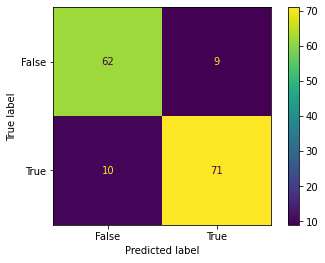

In [47]:
confusion_matrix = metrics.confusion_matrix(y_test_KNN, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Prediction on submission data

**Import the data**

In [49]:
test_data = pd.read_csv('test.csv', index_col='PassengerId')

**Preprocess the data**

In [50]:
test_data.drop(['Cabin'], axis=1, inplace=True)

In [51]:
test_data.drop(['Ticket'], axis=1, inplace=True)

In [52]:
test_data.drop(['Name'], axis=1, inplace=True)

In [53]:
test_mean_age = test_data['Age'].mean()
test_data['Age'].fillna(test_mean_age, inplace=True)

In [54]:
test_fare_mean = test_data['Fare'].mean()
test_data['Fare'].fillna(test_fare_mean, inplace=True)

In [55]:
test_embarked_mode = training_data['Embarked'].mode()
test_data['Embarked'].fillna(test_embarked_mode, inplace=True)

In [56]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


**Data Encoding**

In [57]:
test_data['Sex']= label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked']= label_encoder.fit_transform(test_data['Embarked'])

**Data Normalization**

In [58]:
test_data_scaled  = pd.DataFrame(scaler.fit_transform(test_data.values), columns=test_data.columns, index=test_data.index)

In [59]:
test_data_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.498407,-0.470915
893,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.513274,0.700767
894,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-0.465088,-0.470915
895,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.483466,0.700767
896,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.418471,0.700767


In [60]:
test_data_scaled.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
y_test_predict = KNN.predict(test_data_scaled)

In [62]:
submission_data = pd.DataFrame({'PassengerId': test_data_scaled.index, 'Survived': y_test_predict})

In [63]:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [64]:
submission_data.to_csv(r'submission.csv', index=False)